# Spotify's Data Problem

### Authors:
Quinn Dizon  
Alan Gayahan

### Summary: 

Spotify collects data about all the tracks on its platform. These are features that quantify some aspect of the music, such as _tempo_, _danceability_, and overall positiveness (_valence_), as well as categorical features like _genre_. Spotify provides easy access to this data through its API.  

While the data appears to be clean, scaled, and ready for predictive analysis (linear regression, logistic regression, time series analysis), we find that the metrics provided by Spotify do not lend themselves to this approach. Our analysis discusses some reasons why we believe this is the case, and some alternative methods that may yield better results for this data.  

### Data:
* [Kaggle Spotify Dataset](https://www.kaggle.com/grasslover/spotify-music-genre-list)
* [Spotify API](https://developer.spotify.com/documentation/web-api/) (for supplemental time series information)

***
## Table of Contents


## Data Example
Below is an example from our finalized dataset.

In [9]:
import pandas as pd
pd.options.display.max_columns = 999

In [10]:
data = pd.read_csv("../data/processed/FINAL.zip")
data.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre,Expanded_genre,artist_names,artist_ids,release_date,release_date_precision,Super_genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/audio-analysis/6J2VvzKwWc2f0JP5RQVZjq,282920.0,4.0,celticmetal,celtic metal,The HU,0b2B3PwcYzQAhuJacmcYgc,2018-10-14,day,metal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/audio-analysis/4HA34COgxgVJ6zK88UN4Ik,300320.0,4.0,celticmetal,celtic metal,Gloryhammer,7dkEByOe0oHqc54qU4hwzV,2019-04-12,day,metal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/audio-analysis/3W6Xik6Xxf06JuUoZSATlD,175353.0,4.0,celticmetal,celtic metal,"Orion's Reign,Minniva","3hRL14TJtJqr7i1IH3D1pU,50KIyycosYOGrBHfLaI1Ju",2018-10-05,day,metal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/audio-analysis/2gGveBaLJQMtJ43X4UL5kH,272292.0,4.0,celticmetal,celtic metal,Brothers of Metal,0WPCPYm5IDNtQjuJOGNPcy,2018-11-09,day,metal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/audio-analysis/1lRF81A1C9QoCgBcEop2zg,237933.0,4.0,celticmetal,celtic metal,Powerwolf,5HFkc3t0HYETL4JeEbDB1v,2018-07-13,day,metal


A detail data dictionary can be found directly in [Spotify's Api](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

## Time Series Analysis: 
### Number of tracks released in each month/year 

We began our time series analysis by looking at the release rate of tracks from 1970 to present day. 

In our initial exploration, we resampled our data by month, and produced the following graph. 

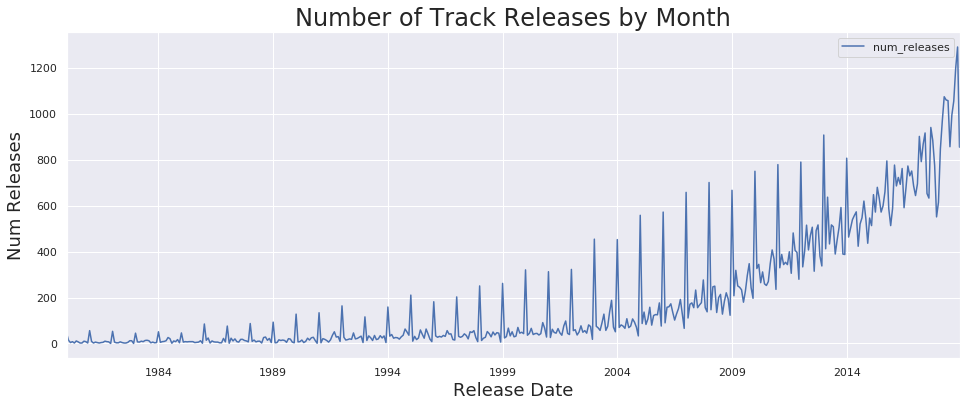

Although this appears to show strong seasonality, further exploration for the day revealed that _xxxx-01-01_ was used as a placeholder for tracks that had a known release year, but unknown date. The large spikes in the graph shown above all occur on the first of January for each year.   

Because of this, we believe this graph is an unreliable representation of actual release dates. 

To adjust, we resampled our data by year to produce the following graph. 

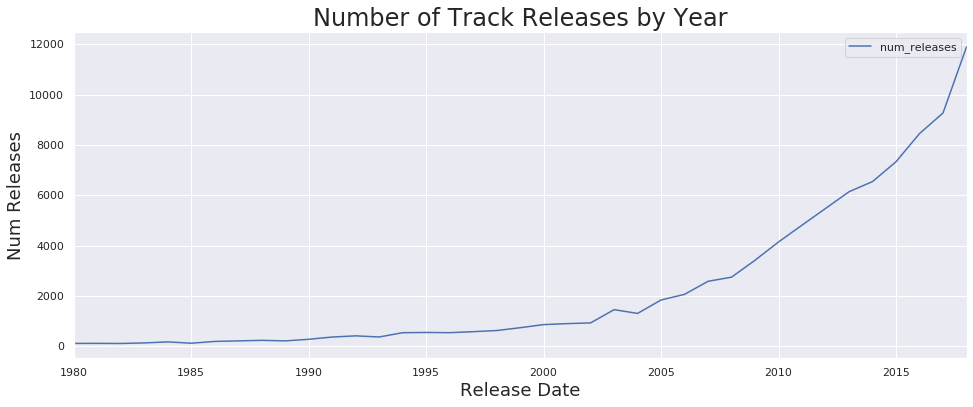

Although no seasonality can be seen in this large scale view, there is a clear and significant upwards trend beginning ca. 2000.  

We believe this sharp increase in tracks released per year has to do with the digital revolution. Advancements in recording and music making technology, as well as decreased costs for basic hardware, have made it so a large number of amateur musicians can quickly and easily produce high quality tracks ready for digital release.   

_The code for the graphs above can be found in /exploration/qd_072819_timeseries_release_date.ipynb_

### Time series analysis of features

Still analyzing our time series data, we plotted the behavior of each numeric feature over time. A sample of our findings is displayed below. 

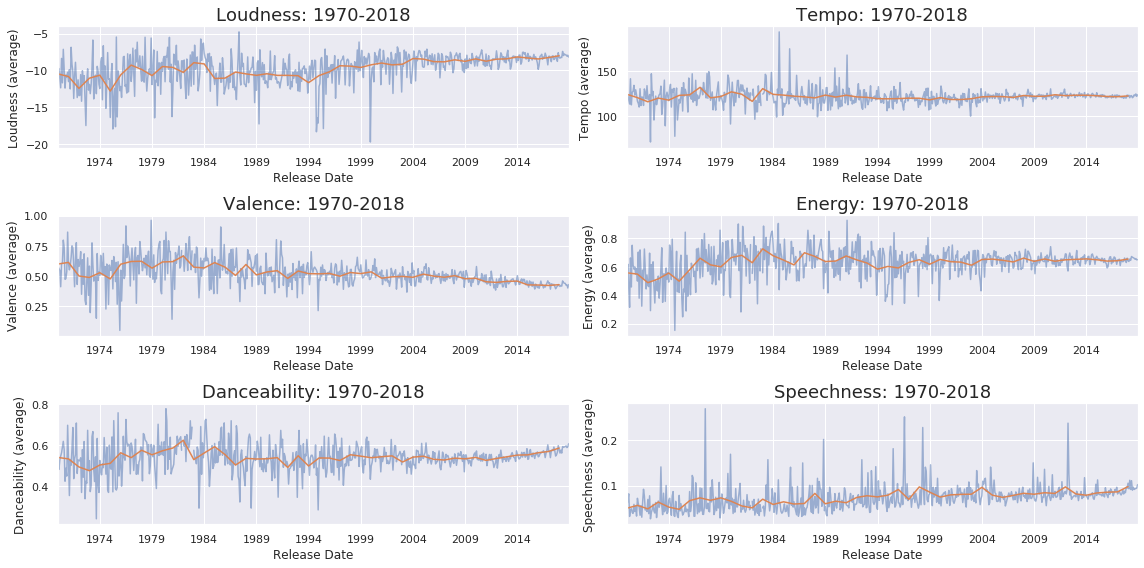

As can be seen in the charts above, there is a clear trend for each feature from a state of relatively high variance to a state of relatively little variance. We refer to this as _feature convergence_, as it appears that, over time, these musical features become more and more standardized across all released tracks.  

While only a small part of the overall picture, the feature convergence shown here is a good indicator of why these features are losing predictive power over time.

_The code for the graphs above can be found in exploration/qd_072719_time_series_exploration.ipynb_

## Linear Regression

### Predicting feature values based on other features

In preparing for a linear regression analysis, we produced the following parirwise graph and correlation graph to see which features have the best correlation and predictive power for other features. 

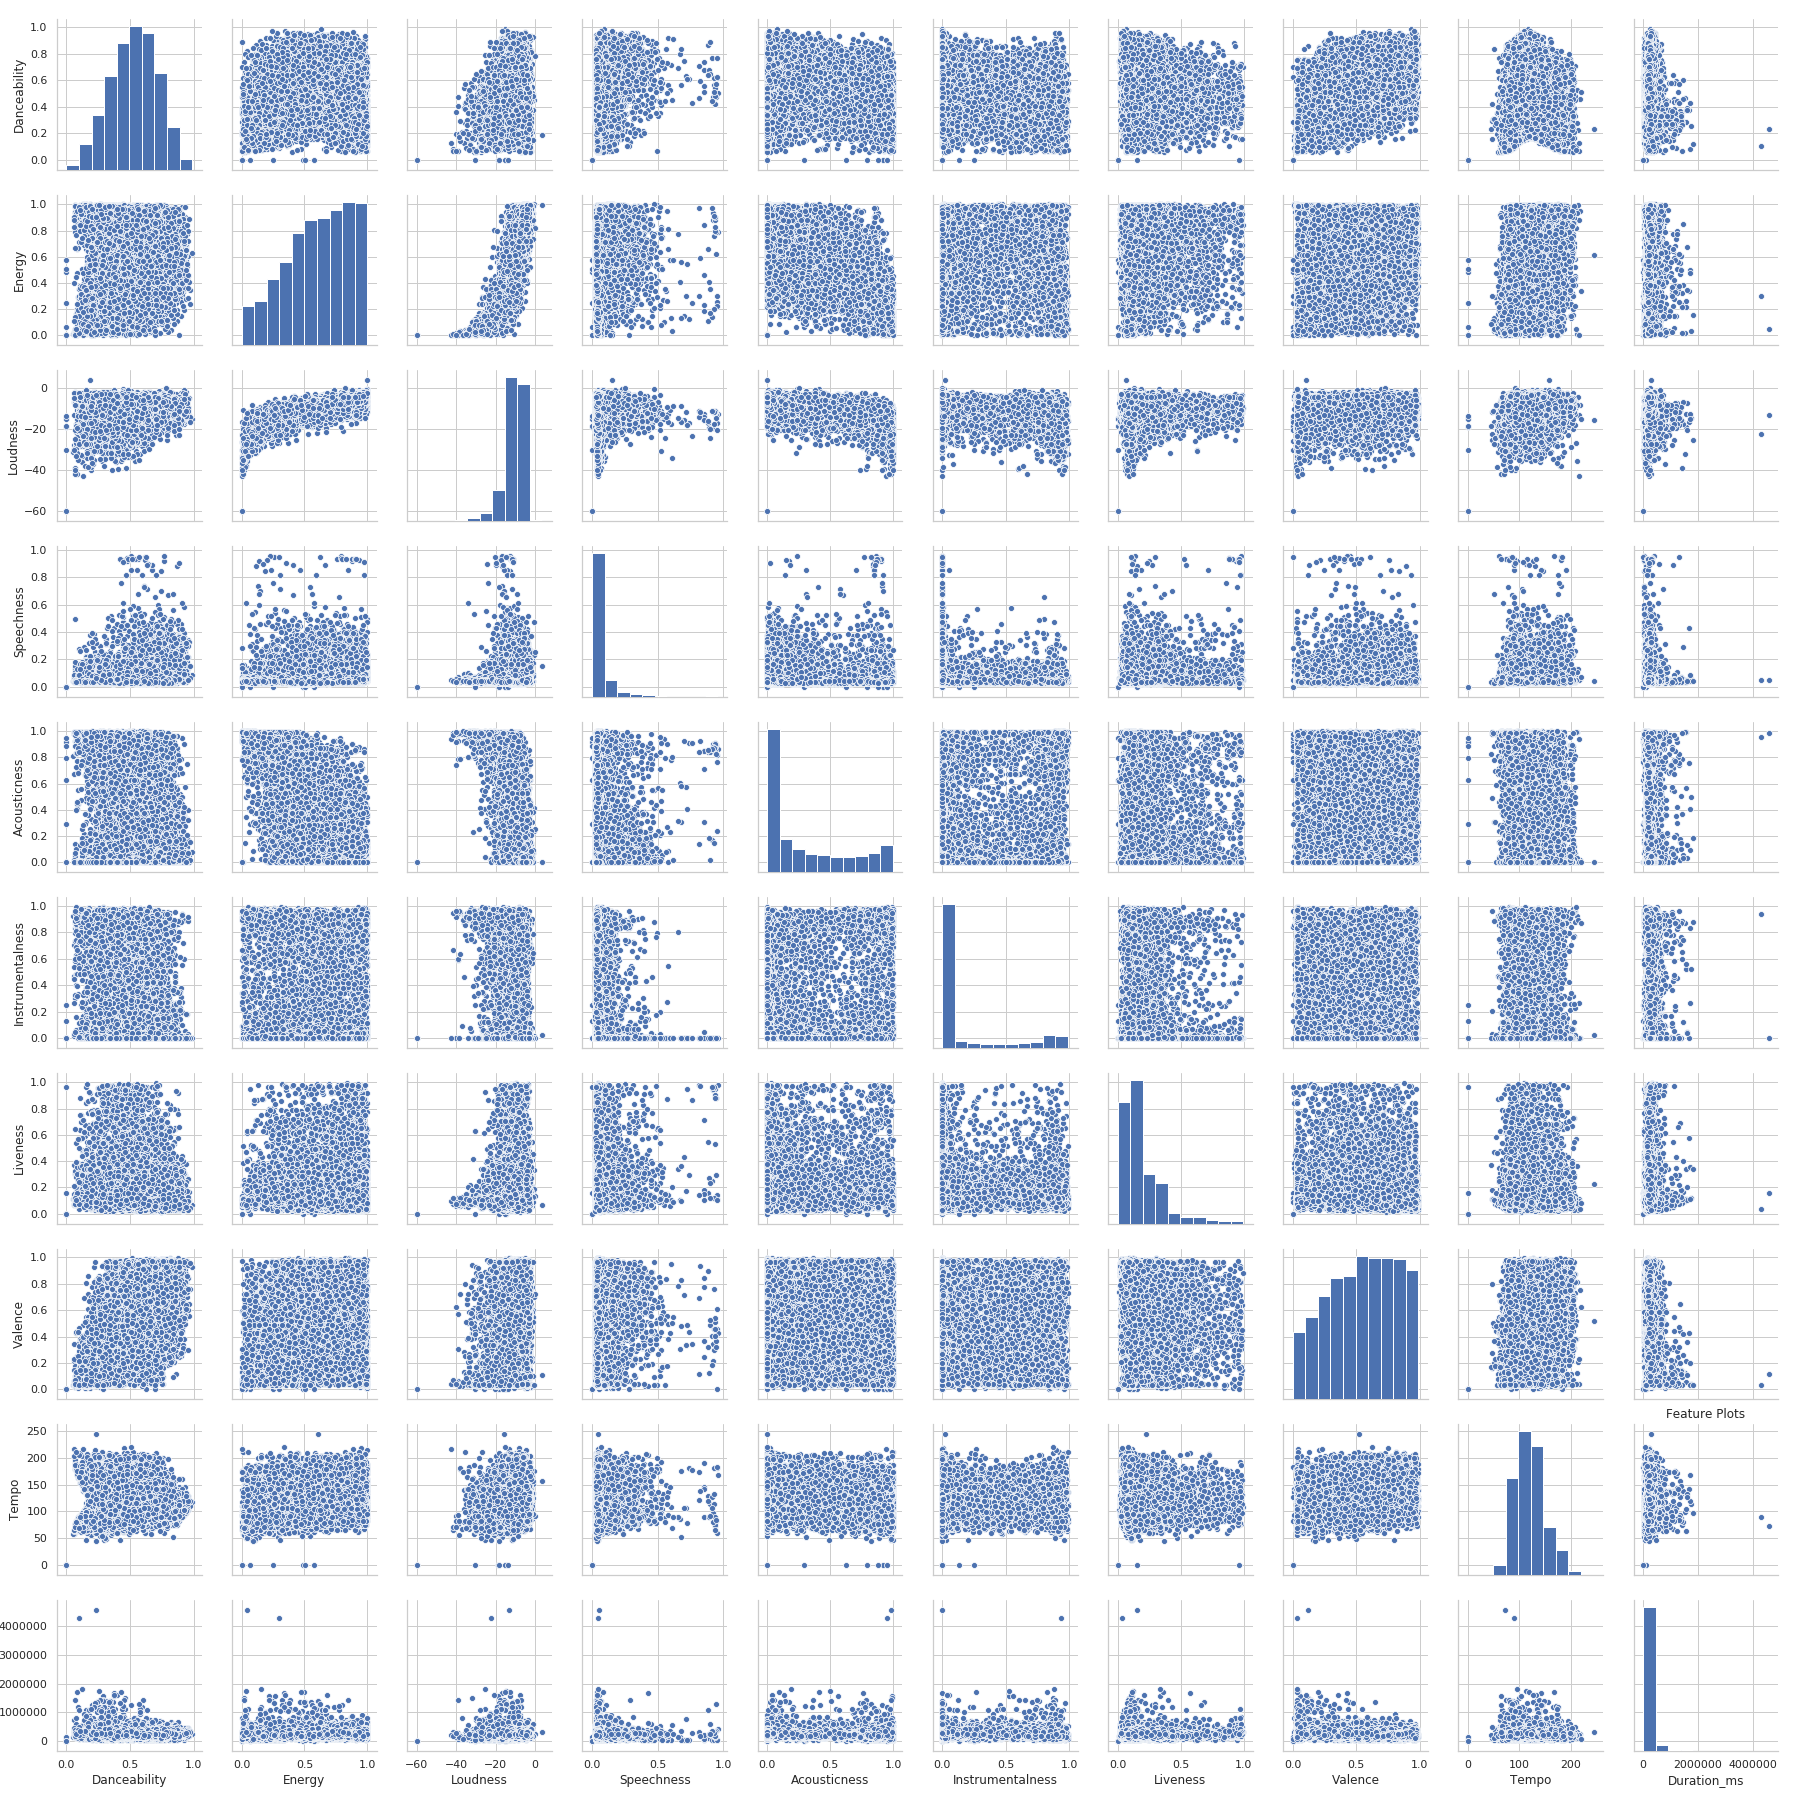

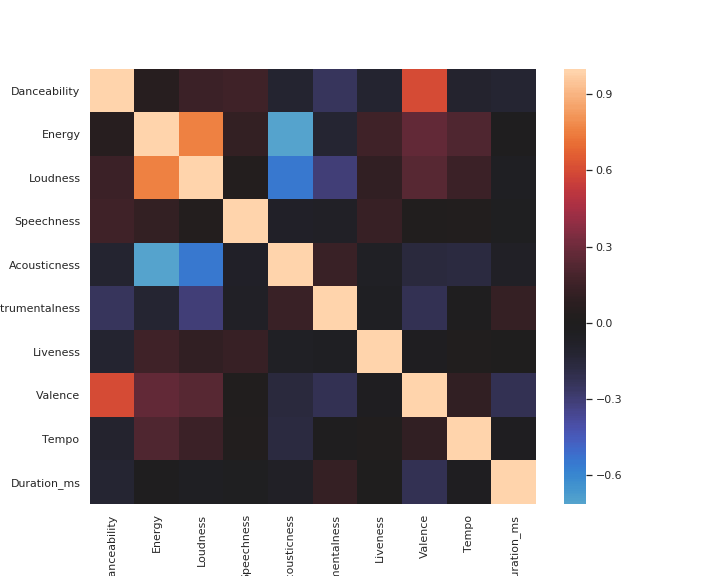

From these charts, we see that there is little correlation between many of the features. In trying to create linear regression models with varying targets, we found that this lack of correlation made for poor predictive results. 

Our best results came when we tried to predict **_Energy_** from the other features. We were able to get an **adjusted R squared score of near 0.8**. This is likely due to the fact that _Energy_ is moderately correlated with _Loudness_. All other models provided substantially smaller adjusted r squared results, likely due to lack of correlated variables.  

This lack of predictive power can likely be attributed to the feature convergence we observed in our time series analysis. Looking to our pairwise plot, we see that the lack of correlation between features is reflected by several uniformly distributed scatter plots.

_The full linear regression code can be found in exploration/072919_numerical_linear_regression_exploration.ipynb_

***
## Logistic Regression

### Genre/Style prediction

After subsetting our data into a number of _Super Genres_ (e.g. pop, rock, country, etc.), we attempted to see if the feature set would allow us to accurately predict one genre from another.  

We began by conducting simple pairwise predictions between two genres. The results for these categorical predictions varied based on which two genres we compared.  

In total, we ran more than 300 pairwise logistic regression models. A sample of ROC graphs and AUC scores are displayed below. As can be seen, some models were able to achieve nearly perfect classifications, while others were not. 

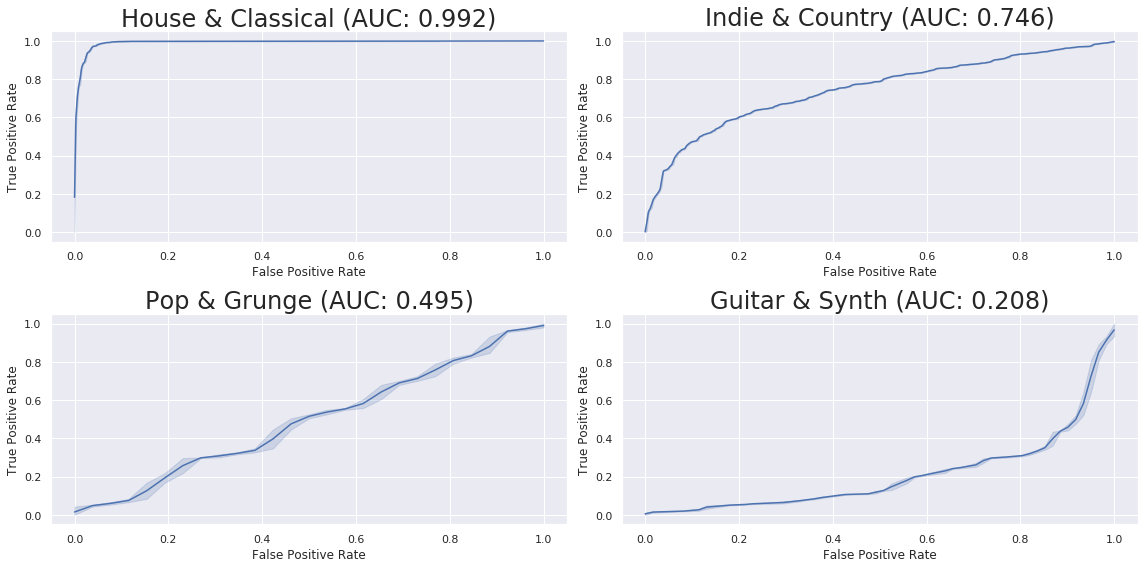

When we expanded our logistic regression model to predict between multiple genres at once (multinomial logistic regression), we found that our mean accuracy dropped to around 0.44. This, again, likely points to the feature convergence we observed, as these features do not seem to be good predictors of genre in general (even if a few pairs of genres are easily distinguishable).  

## Time series analysis accounting for genre 

Because of our limited success in predicting genres from our data, we returned to our time series analysis and looked at our data as related to specific genres.  

For this further genre analysis, we selected the top 5 most produced genres: **_indie, pop, metal, rock, and folk_**.  We then graphed how specific features changed over time as they related to these genres. 

A sample of our graphs are displayed below. 

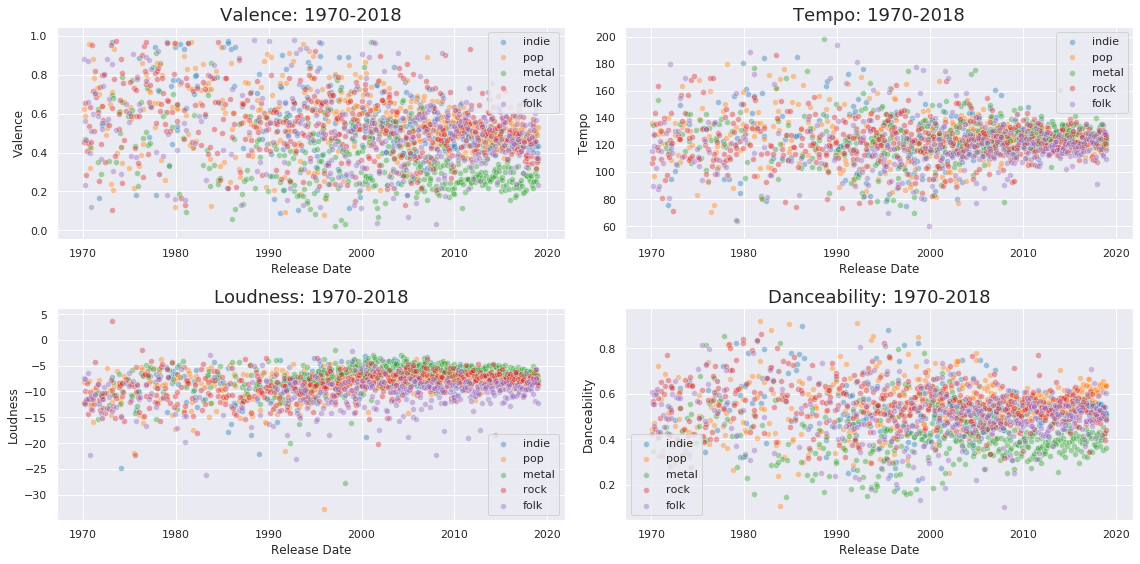

_The code for this analysis and the above graph can be found in exploration/qd_073019_timeseries_with_genres.ipynb_

This analysis confirms many of our previous observations and assumptions about why these metrics perform poorly for regression analysis. 

As we can see again in these plots, there is feature convergence to relatively small bands as time progresses. These dense clusters show that genres are becoming more and more difficult to distinguish as the feature set becomes more and more homogeneous.   

## Conclusions & Insights  

Based on the results of our analysis, we believe that the metrics provided by Spotify are not suitable for these types of regression models. This leaves us with two recommendations for further analysis:  

1. It is possible that other machine learning methods may yield better results. Since genres are largely self assigned, it may be reasonable to assume that an unsupervised clustering method could better place tracks into distinct categories. Other, more robust machine learning models (neural networks) may also be able to achieve better results with the provided features.

2. Spotify should consider supplementing their current feature set with better metrics. Of note, (and from several years spent in this domain) these metrics do nothing to account for how a given track might change over time. Incorporating metrics that monitor how a track changes from beginning to end (or does not change) could provide significant boosts in predictive power.    